# Jonathan Halverson
# Thursday, February 25, 2016
# AB Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

# Equation-based

Let's say we show one-half of our web site visitors ad A and the other half ad B. After 1 week we get $n_A$  clicks out of $N_A$ page loads of ad A and $n_B$ clicks out of $N_B$ for B. We wish to say which add is more effective or if they are the same.

We can model each visit to the site as a Bernoulli trial since the user either clicks on the ad with probability p or they don't (with probability 1 - p). Therefore, $n/N$ should be normally distributed -- if we get a sufficient number of clicks -- with mean $p$ and $\sigma = \sqrt{p(1-p)/N}$ for A and B.

In [2]:
def ab_test_statistic(n_A, N_A, n_B, N_B):
     p_A = float(n_A) / N_B
     p_B = float(n_B) / N_B
     sigma_A = (p_A * (1.0 - p_A) / N_A)**0.5
     sigma_B = (p_B * (1.0 - p_B) / N_B)**0.5
     return (p_B - p_A) / (sigma_A**2 + sigma_B**2)**0.5

def two_sided_p_value(Z):
     from scipy.stats import norm
     return 2.0 * norm.cdf(-abs(Z))

In [3]:
Z = ab_test_statistic(n_A=227, N_A=500, n_B=250, N_B=500)
print "Z =", Z
p_value = two_sided_p_value(Z)
print "p =", p_value

Z = 1.45773556253
p = 0.144913445612


In this case we would fail to reject the null hypothesis (if $\alpha=0.05$) meaning there is insufficient evidence to conclude that the two ads have different efficacies. 

# Permutation

### From pg. 82 of Bruce

Consider an A/B test where two difference prices are considered and the number of conversions and no converions are recorded for each:

In [4]:
c_a = 200
c_b = 182
n_a = 23539
n_b = 22406

In [5]:
diff_propor = c_a / float(n_a+c_a) - c_b / float(n_b+c_b)
diff_propor

0.0003675791182059275

We see that the two cases, A and B, have approximately the same proportion. The null hypothesis is that the two cases are the same and the slight difference can be explained by chance. The alternative hypothesis is that the difference is real. Let's compute the p-value and find out.

In [6]:
vals = np.hstack([np.zeros(n_a + n_b), np.ones(c_a + c_b)])

In [7]:
dps = []
for _ in xrange(10000):
     z = np.random.permutation(vals)
     dp = z[:c_a+n_a].mean() - z[c_a+n_a:].mean()
     dps.append(dp)

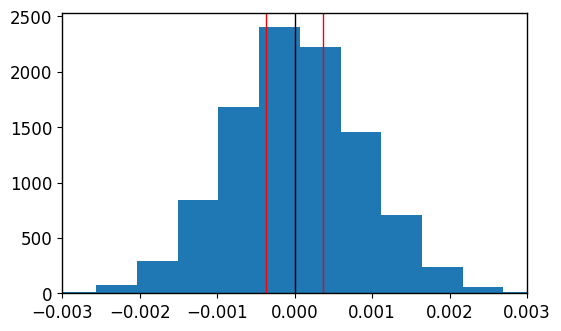

In [8]:
plt.hist(dps, bins=12)
plt.xlim(-0.003, 0.003)
plt.axvline(0, color='k')
plt.axvline(diff_propor, color='r')
plt.axvline(-diff_propor, color='r')

In [9]:
dps = np.array(dps)

In [10]:
p_value = dps[(dps < -diff_propor) | (dps > diff_propor)].size / float(dps.size)
p_value

0.6417

We see that the p-value is much larger than 0.05 indicating that the null hypothesus is accepted.

Here is the equation based approach for difference of two proportions:

In [11]:
p_A = float(c_a) / (n_a + c_a)
p_B = float(c_b) / (n_b + c_b)
sigma_A = p_A * (1.0 - p_A) / (n_a + c_a)
sigma_B = p_B * (1.0 - p_B) / (n_b + c_b)
SE = np.sqrt(sigma_A + sigma_B)
Z = ((p_A - p_B) - 0.0) / SE
Z

0.43754904762747932

In [12]:
from scipy.stats import norm
p_value = 2.0 * norm.cdf(-abs(Z))
p_value

0.66171321376325731